# Stock Market Data Analysis Project

The aim of this project is to answer the following questions based on data stock data for various technology companies:

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between difference stocks' closing prices?
5. What was the correlation between different stocks' daily returns?
6. How much value do we put at risk by investing in a particular stock?
7. How can we attempt to predict future stock behaviour?


In [15]:
#import analytics libraries
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [16]:
#import viz libraries
import matplotlib.pyplot as plt
import seaborn as sns
# set a white grid background for seaborn vizs
sns.set_style('whitegrid')
%matplotlib inline

In [17]:
#import libraries for reading stock information from the net
import pandas_datareader as pdr
from pandas_datareader import data as web, wb

In [18]:
#import timestamp library
from datetime import datetime

In [19]:
#create list of tech stocks
tech_list = ['AAPL','GOOG', 'MSFT', 'AMZN']

#specify time period - starting for one year ago
start = datetime(2017,1,1)
end = datetime(2017,12,31)

In [20]:
#access quandl and loop through the four stocks to scrape data
for stock in tech_list:
    globals()[stock] = web.DataReader(stock, 'quandl',start,end)
#each stock now has an assigned data frame, e.g.
GOOG.describe()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
count,250.000000,250.000000,250.000000,250.000000,2.500000e+02,250.0,250.0,250.000000,250.000000,250.000000,250.000000,2.500000e+02
mean,920.682200,926.433173,914.878262,921.309616,1.451915e+06,0.0,1.0,920.682200,926.433173,914.878262,921.309616,1.451915e+06
std,77.092116,78.147437,76.173111,77.024065,6.244651e+05,0.0,0.0,77.092116,78.147437,76.173111,77.024065,6.244651e+05
min,778.810000,789.630000,775.800000,786.140000,5.369580e+05,0.0,1.0,778.810000,789.630000,775.800000,786.140000,5.369580e+05
25%,835.632500,841.962500,830.987500,836.907500,1.078290e+06,0.0,1.0,835.632500,841.962500,830.987500,836.907500,1.078290e+06
50%,929.730000,934.305000,923.532500,929.465000,1.264786e+06,0.0,1.0,929.730000,934.305000,923.532500,929.465000,1.264786e+06
75%,971.742500,978.502500,964.780000,972.590000,1.625614e+06,0.0,1.0,971.742500,978.502500,964.780000,972.590000,1.625614e+06
max,1075.200000,1078.490000,1063.550000,1077.140000,5.125791e+06,0.0,1.0,1075.200000,1078.490000,1063.550000,1077.140000,5.125791e+06


In [21]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2017-12-29 to 2017-01-03
Data columns (total 12 columns):
Open          249 non-null float64
High          249 non-null float64
Low           249 non-null float64
Close         249 non-null float64
Volume        249 non-null float64
ExDividend    249 non-null float64
SplitRatio    249 non-null float64
AdjOpen       249 non-null float64
AdjHigh       249 non-null float64
AdjLow        249 non-null float64
AdjClose      249 non-null float64
AdjVolume     249 non-null float64
dtypes: float64(12)
memory usage: 25.3 KB


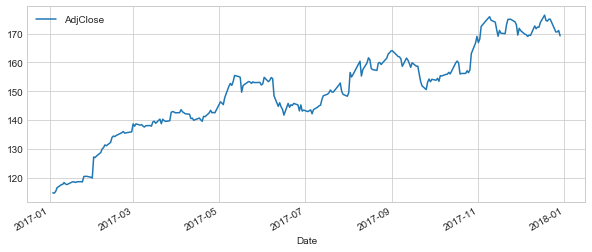

In [22]:
#historical view of the closing price for Apple
AAPL['AdjClose'].plot(legend=True,figsize=(10,4))

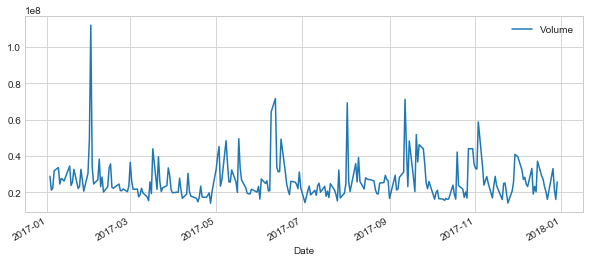

In [23]:
#plot total volume traded over the past year
AAPL['Volume'].plot(legend=True,figsize=(10,4))

In [24]:
#calculate the moving average for the stock
# a 10, 20 and 50 day moving average

ma_day = [10,20,50]

for ma in ma_day:
    column_name= "MA for %s days" %(str(ma))
#use pandas rolling mean function to calculation moving ave    
    AAPL[column_name] = pd.rolling_mean(AAPL['AdjClose'],ma)

C:\Users\Mitchell\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=10,center=False).mean()
  if __name__ == '__main__':
C:\Users\Mitchell\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=20,center=False).mean()
  if __name__ == '__main__':
C:\Users\Mitchell\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=50,center=False).mean()
  if __name__ == '__main__':


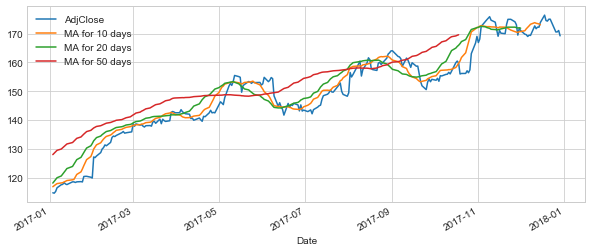

In [25]:
#pass the list of column names in the data frame for the stock
#and plot them
AAPL[
    ['AdjClose','MA for 10 days', 'MA for 20 days', 'MA for 50 days'
]].plot(subplots=False,figsize=(10,4))

In [26]:
#note that the moving average for longer time becomes smoother as we lose the granularity of daily fluctuations

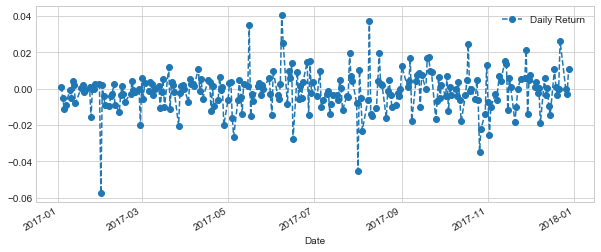

In [27]:
#analysis of daily returns

#note quandl did not provide daily returns, so we can calc ourselves
#we can use pandas percent change function
AAPL['Daily Return'] = AAPL['Close'].pct_change()

#plot the daily return
AAPL['Daily Return'].plot(figsize=(10,4),legend=True,linestyle='--',marker='o')

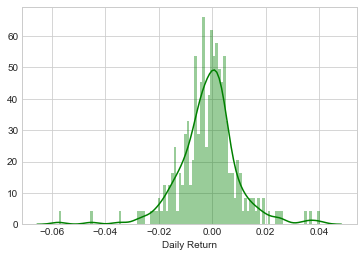

In [28]:
#use seaborn for histogram of daily returns
#distplot allows for a histogram and KDE plot on top of one another

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='green')

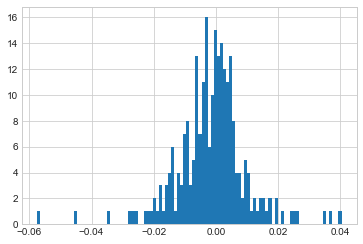

In [29]:
#we can use pandas built in histogram for the same plot 
AAPL['Daily Return'].hist(bins=100)

In [30]:
#start to compare the closing prices for the four stocks
#new df reading the Closing Prices for the four stocks off morningstar
closing_df = web.DataReader(tech_list, 'morningstar',start,end)['Close']
#reshape the DF
closing_df = closing_df.unstack('Symbol')
closing_df.head()

Symbol,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-01-02,115.82,749.87,771.82,62.14
2017-01-03,116.15,753.67,786.14,62.58
2017-01-04,116.02,757.18,786.90,62.30
2017-01-05,116.61,780.45,794.02,62.30
2017-01-06,117.91,795.99,806.15,62.84


In [31]:
#percentage change in closing prices

tech_rets = closing_df.pct_change()
tech_rets.head()

Symbol,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-01-02,NaN,NaN,NaN,NaN
2017-01-03,0.002849,0.005068,0.018554,0.007081
2017-01-04,-0.001119,0.004657,0.000967,-0.004474
2017-01-05,0.005085,0.030732,0.009048,0.000000
2017-01-06,0.011148,0.019912,0.015277,0.008668


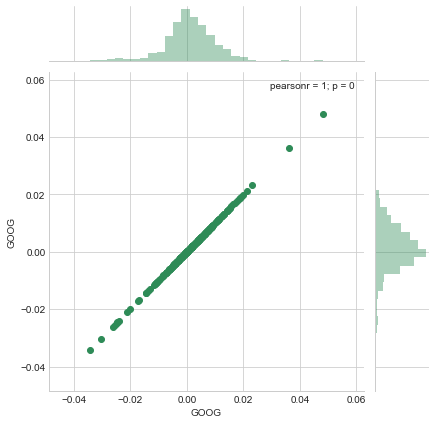

In [32]:
#correlation
#at first Google with its self - correlation should be 1
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter',color='seagreen')

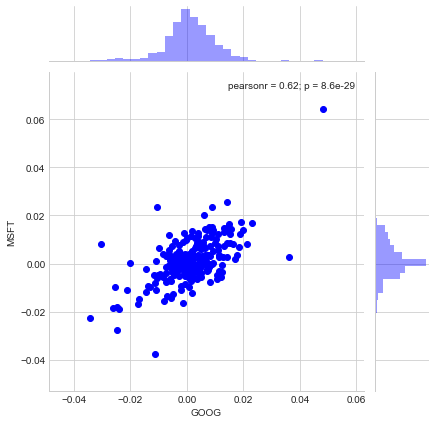

In [33]:
#correlation between Google and Microsoft
sns.jointplot('GOOG','MSFT', tech_rets, kind='scatter', color='blue')

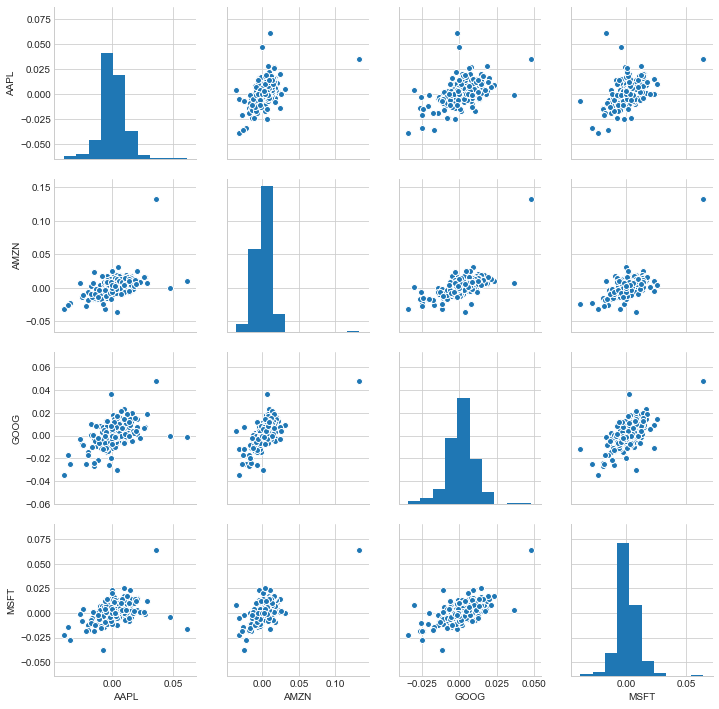

In [34]:
#repeat the comparison analysis above for all stocks against each other

sns.pairplot(tech_rets.dropna())

C:\Users\Mitchell\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


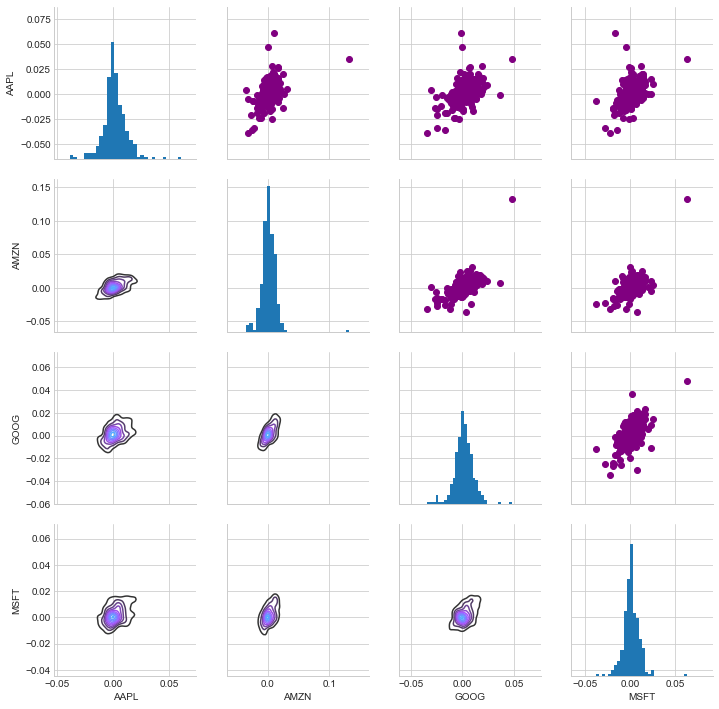

In [35]:
#do a pair grid for
returns_fig = sns.PairGrid(tech_rets.dropna())

#change the upper triangle
returns_fig.map_upper(plt.scatter,color='purple')

#change the lower triange
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

#change the diagonals
returns_fig.map_diag(plt.hist,bins=30)

C:\Users\Mitchell\Anaconda3\lib\site-packages\matplotlib\contour.py:967: UserWarning: The following kwargs were not used by contour: 'label', 'color'
  s)


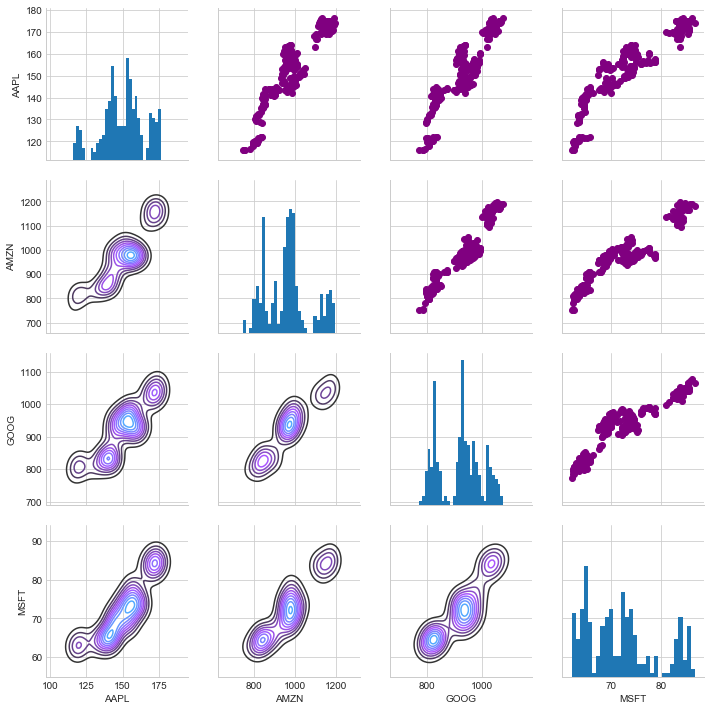

In [36]:
#repeat the above for the closing prices
#do a pair grid for
returns_fig = sns.PairGrid(closing_df)

#change the upper triangle
returns_fig.map_upper(plt.scatter,color='purple')

#change the lower triange
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

#change the diagonals
returns_fig.map_diag(plt.hist,bins=30)

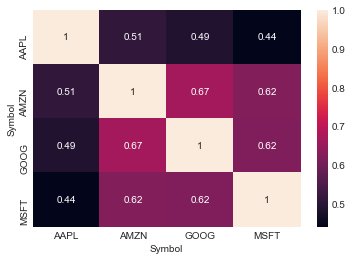

In [37]:
#correlation plot of daily returns

corr = tech_rets.dropna().corr()
sns.heatmap(corr,annot=True)

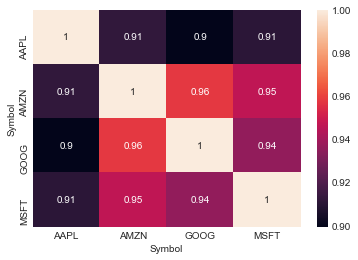

In [38]:
#correlation plot of closing prices

corr2 = closing_df.corr()
sns.heatmap(corr2, annot=True)

## Risk analysis by comparison Risk to Expected Return

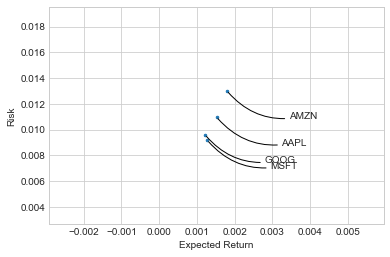

In [49]:
#drop null values from old df
rets = tech_rets.dropna()

#set the area for the scatterplot points
area = np.pi*2
plt.scatter(rets.mean(),rets.std(),s = area)
plt.xlabel('Expected Return')
plt.ylabel('Risk')

#for annotation only:

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(
        label,
        xy= (x, y), xytext = (90, -30),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

^^^Amazon has the highest expected return but also carries the greatest risk

## Value at risk
using bootstrap method

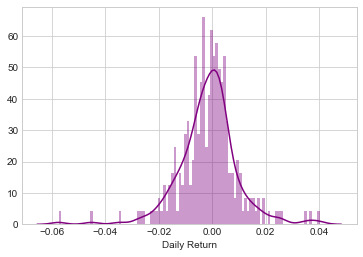

In [52]:
#re-plot the daily returns for Apple

sns.distplot(AAPL['Daily Return'].dropna(),bins=100,color='purple')


In [53]:
rets.head()

Symbol,AAPL,AMZN,GOOG,MSFT
Date,,,,
2017-01-03,0.002849,0.005068,0.018554,0.007081
2017-01-04,-0.001119,0.004657,0.000967,-0.004474
2017-01-05,0.005085,0.030732,0.009048,0.000000
2017-01-06,0.011148,0.019912,0.015277,0.008668
2017-01-09,0.009160,0.001168,0.000620,-0.003183


In [55]:
#return at the 95% confidence interval 
rets['AAPL'].quantile(0.05)

-0.01478062961740657

^^^95% of the time your worst daily loss would not exceed 0.0147%

Value at Risk using the Monte Carlo Method 
1. check out Investopedia for theoretical explanantion of GMB an Monte Carlo method

In [115]:
#set equation input variables for google

days=10
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

print(days,dt,mu,sigma)

10 0.1 0.0012215666627810341 0.009588665922597701


In [210]:
#define equation as a function

def stock_monte_carlo(start_price,days,mu,sigma):

    
    # Define a price array
    price = np.zeros(days)
    price[0] = start_price
    # Schok and Drift
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # Run price array for number of days
    for x in range(1,days):
        
        # Calculate Schock
        shock[x] = np.random.normal(loc=mu * dt, scale=sigma * np.sqrt(dt))
        # Calculate Drift
        drift[x] = mu * dt
        # Calculate Price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
        
    return price
    

In [211]:
GOOG.head()

,Open,High,Low,Close,Volume,ExDividend,SplitRatio,AdjOpen,AdjHigh,AdjLow,AdjClose,AdjVolume
Date,,,,,,,,,,,,
2017-12-29,1046.72,1049.70,1044.90,1046.40,867943.0,0.0,1.0,1046.72,1049.70,1044.90,1046.40,867943.0
2017-12-28,1051.60,1054.75,1044.77,1048.14,829623.0,0.0,1.0,1051.60,1054.75,1044.77,1048.14,829623.0
2017-12-27,1057.39,1058.37,1048.05,1049.37,1214775.0,0.0,1.0,1057.39,1058.37,1048.05,1049.37,1214775.0
2017-12-26,1058.07,1060.12,1050.20,1056.74,756324.0,0.0,1.0,1058.07,1060.12,1050.20,1056.74,756324.0
2017-12-22,1061.11,1064.20,1059.44,1060.12,734566.0,0.0,1.0,1061.11,1064.20,1059.44,1060.12,734566.0


Text(0.5,1,'Monte Carlo Analysis for Google')

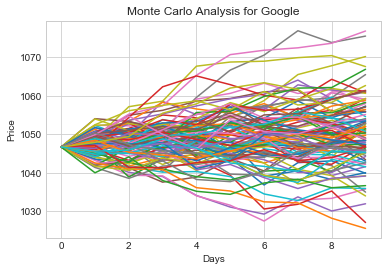

In [220]:
# Get start price from GOOG.head()
start_price = 1046.72

for run in range(100):
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for Google')

In [216]:
#we can do a histogram of the above, but on a larger scale:
#it was take all of the final values of the function, 100 times

runs = 1000

simulation = np.zeros(runs)

for run in range(runs):
    simulation[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

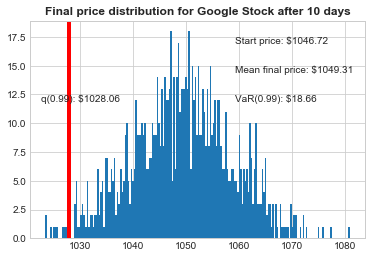

In [227]:
#use numpy for define q as the 1% empirical quantile
#so 99% of the values will fit in our output

q = np.percentile(simulation,1)

plt.hist(simulation,bins=200)

#additional plot graphss/info:

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulation.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Google Stock after %s days" % days, weight='bold');

The above shows a relatively stable stock, as the start price and end price are very close,<br>
also, the Value at Risk is only 18.66, meaning that, across the year, 99% of the time the largest amount <br>
that could have been lost was $18.66